Q1. Identifies which of the three proposals you outlined in your lightning talk you have chosen.

Q2. Articulates the main goal of your project.

Q3. Outlines your proposed methods and models.

Q4. Defines the risks & assumptions of your data.

Q5. Revises initial goals & success criteria, as needed.

Q6. Performs & summarizes the EDA of your data.

1. ENGLISH PREMIERSHIP SOCCER GAMES. DATA BEING USED ARE THE 2016 & 2017 ENGLISH PREMIERSHIP DATA.
2. MAKING PREDICTIONS ON A GAME BY GAME BASIS
3. CLASSIFICATION AND REGRESSION MODEL. CLASSIFY THE FIRST FOUR TEAMS AS QUALIFYING TEAM FOR CHAMPIONS LEAGUE 
COMPETITION AND LAST FOUR AS RELEGATED TEAM. PREDICT THE EVENTUAL WINNER OF THE PREMIERSHIP.
4. NO MISSING DATA
5. WILL INCLUDE FAN'S TWEETS TO HELP IN MY PREDICTIONS. I HAVE INCORPORATED TWEET'S IN MY CODE USING TWITTER API AS THE SOURCE.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from scipy.stats import mode 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
soccer16 = pd.read_csv('/Users/grace/Desktop/CAPSTONE/Soccer2016.csv')
soccer15 = pd.read_csv('/Users/grace/Desktop/CAPSTONE/Soccer2016.csv')

In [18]:
soccer16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [22]:
soccer15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [23]:
import twitter

In [24]:
import twitter, re, datetime, pandas as pd

# your keys go here:
twitter_keys = {
    'consumer_key':        '6d8Cn56PAbiD7SKfVjWgaUEmw',
    'consumer_secret':     '39cNr3etijqs6tYilDEYgY3Ye2bqpHj6yWmFjGowroBiu2o0Fa',
    'access_token_key':    '149817088-Gum0IufiZBjTcprddq3IxkR6txpP4Wp3r9kopZzM',
    'access_token_secret': 'OIMVvJitZZAgVkdbW2r4ftiQPt5QKXoqb8eWJYsjpuqF3'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)

In [25]:
class TweetMiner(object):

    result_limit    =   20    
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 20):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="dyerrington", mine_rewteets=False, max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'handle':          item.user.name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [26]:
miner = TweetMiner(keys_dict=twitter_keys,api=api, result_limit=200)

In [33]:
bbc_tweets = miner.mine_user_tweets(user='premierleague', )

In [34]:
pd.DataFrame(bbc_tweets)

,created_at,handle,mined_at,retweet_count,text,tweet_id
0,Tue Nov 14 21:18:42 +0000 2017,Premier League,2017-11-14 18:48:54.569906,290,RT @ManCity: Update on @aguerosergiokun. #manc...,930545551468384256
1,Tue Nov 14 21:18:22 +0000 2017,Premier League,2017-11-14 18:48:54.569915,2106,RT @SpursOfficial: 32': ⚽️\n63': ⚽️\n73': ⚽️\n...,930545467326332928
2,Tue Nov 14 20:51:17 +0000 2017,Premier League,2017-11-14 18:48:54.569917,82,Pure 🚀🚀🚀\n\n#GoalOfTheDay is a @1jamesbeattie ...,930538651930513408
3,Tue Nov 14 18:39:04 +0000 2017,Premier League,2017-11-14 18:48:54.569919,88,"""Harry Kane will run Shearer close for #PL sco...",930505375568326657
4,Tue Nov 14 18:33:18 +0000 2017,Premier League,2017-11-14 18:48:54.569920,54,RT @CPFC: 💥 PICK THAT OUT! 🤸\n\n🥋 @MartinKelly...,930503926427897856
5,Tue Nov 14 17:08:55 +0000 2017,Premier League,2017-11-14 18:48:54.569922,888,RT @LFC: 9⃣ million Twitter followers?\n\nOnly...,930482688263376898
6,Tue Nov 14 16:24:27 +0000 2017,Premier League,2017-11-14 18:48:54.569923,51,You never forget your first...\n\nAt the fifth...,930471500301373441
7,Tue Nov 14 16:23:20 +0000 2017,Premier League,2017-11-14 18:48:54.569925,28,RT @NUFC: 🎥 Here's a quick look behind the sce...,930471216691007488
8,Tue Nov 14 14:50:05 +0000 2017,Premier League,2017-11-14 18:48:54.569926,41,Leon Britton is relishing new player-coach @Sw...,930447753062297600
9,Tue Nov 14 13:48:26 +0000 2017,Premier League,2017-11-14 18:48:54.569928,941,Two for a teenage @WayneRooney fired @ManUtd t...,930432236704460800


In [29]:
soccer = pd.concat([soccer15, soccer16], axis=0)

In [97]:
soccer.iloc[700:789, 0:20].head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY
320,E0,16/04/17,Man United,Chelsea,2,0,H,1,0,H,R Madley,9,5,3,0,16,20,1,3,3
321,E0,16/04/17,West Brom,Liverpool,0,1,A,0,1,A,J Moss,7,15,2,2,15,9,4,4,3
322,E0,17/04/17,Middlesbrough,Arsenal,1,2,A,0,1,A,A Taylor,13,12,5,4,11,16,2,4,2
323,E0,22/04/17,Bournemouth,Middlesbrough,4,0,H,2,0,H,G Scott,20,5,10,2,4,14,4,3,0
324,E0,22/04/17,Hull,Watford,2,0,H,0,0,D,R Madley,8,13,3,2,10,11,4,7,3


In [62]:
soccer['GD'] = soccer['FTHG'] - soccer['FTAG']

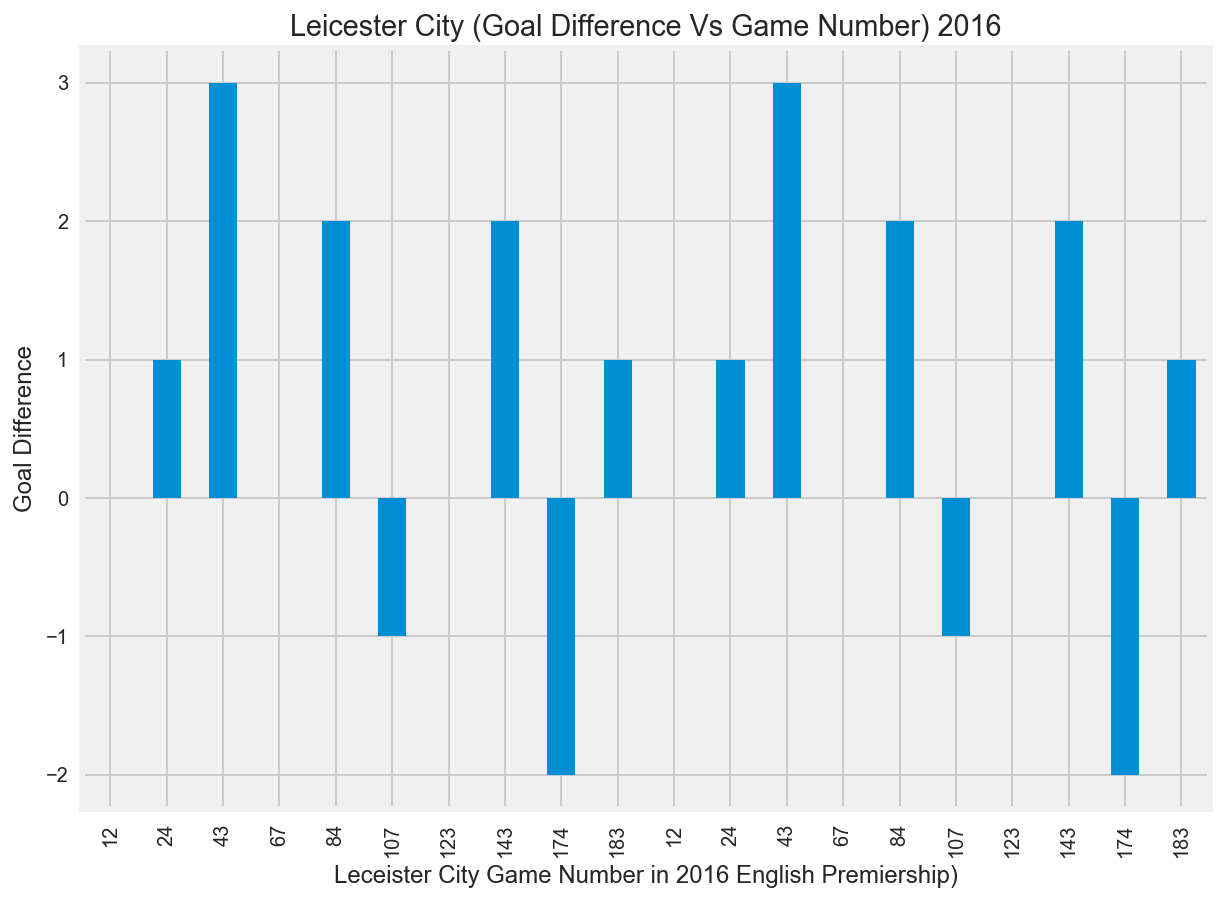

In [113]:
soccer.loc[(soccer['Date'].str.contains('16')) & (soccer['HomeTeam']=='Leicester'), 'GD'].plot(
                                                kind = 'bar', figsize = (9, 7),
                                                title = 'Leicester City (Goal Difference Vs Game Number) 2016')
plt.xlabel('Leceister City Game Number in 2016 English Premiership)')
plt.ylabel('Goal Difference');

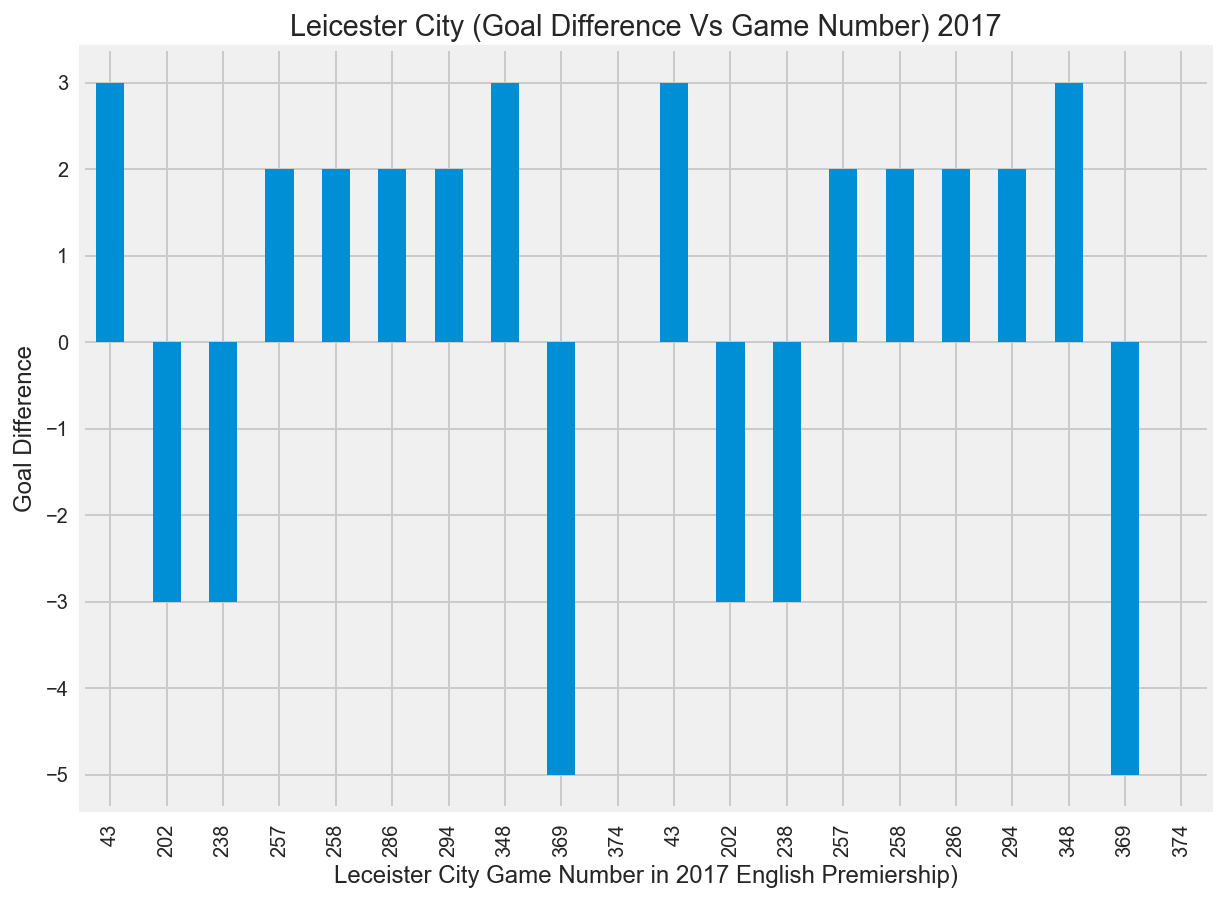

In [114]:
soccer.loc[(soccer['Date'].str.contains('17')) & (soccer['HomeTeam']=='Leicester'), 'GD'].plot(
                                                kind = 'bar', figsize = (9, 7), 
                                                title = 'Leicester City (Goal Difference Vs Game Number) 2017')
plt.xlabel('Leceister City Game Number in 2017 English Premiership)')
plt.ylabel('Goal Difference');

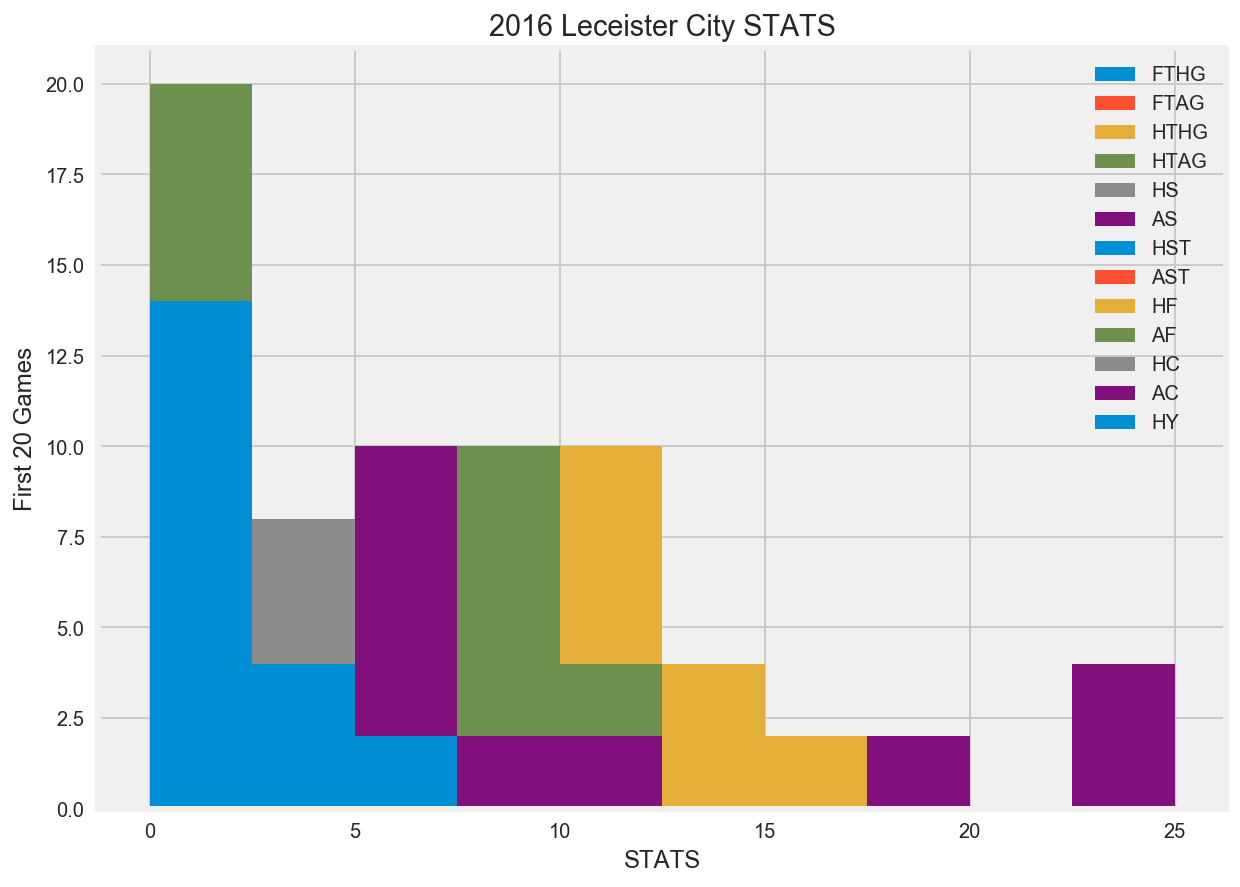

In [116]:
soccer.loc[(soccer['Date'].str.contains('16')) & (soccer['HomeTeam']=='Leicester'), :].iloc[0:20, : 20].plot(
                                                kind='hist', figsize = (9, 7), title = '2016 Leceister City STATS')
plt.xlabel('STATS')
plt.ylabel('First 20 Games');

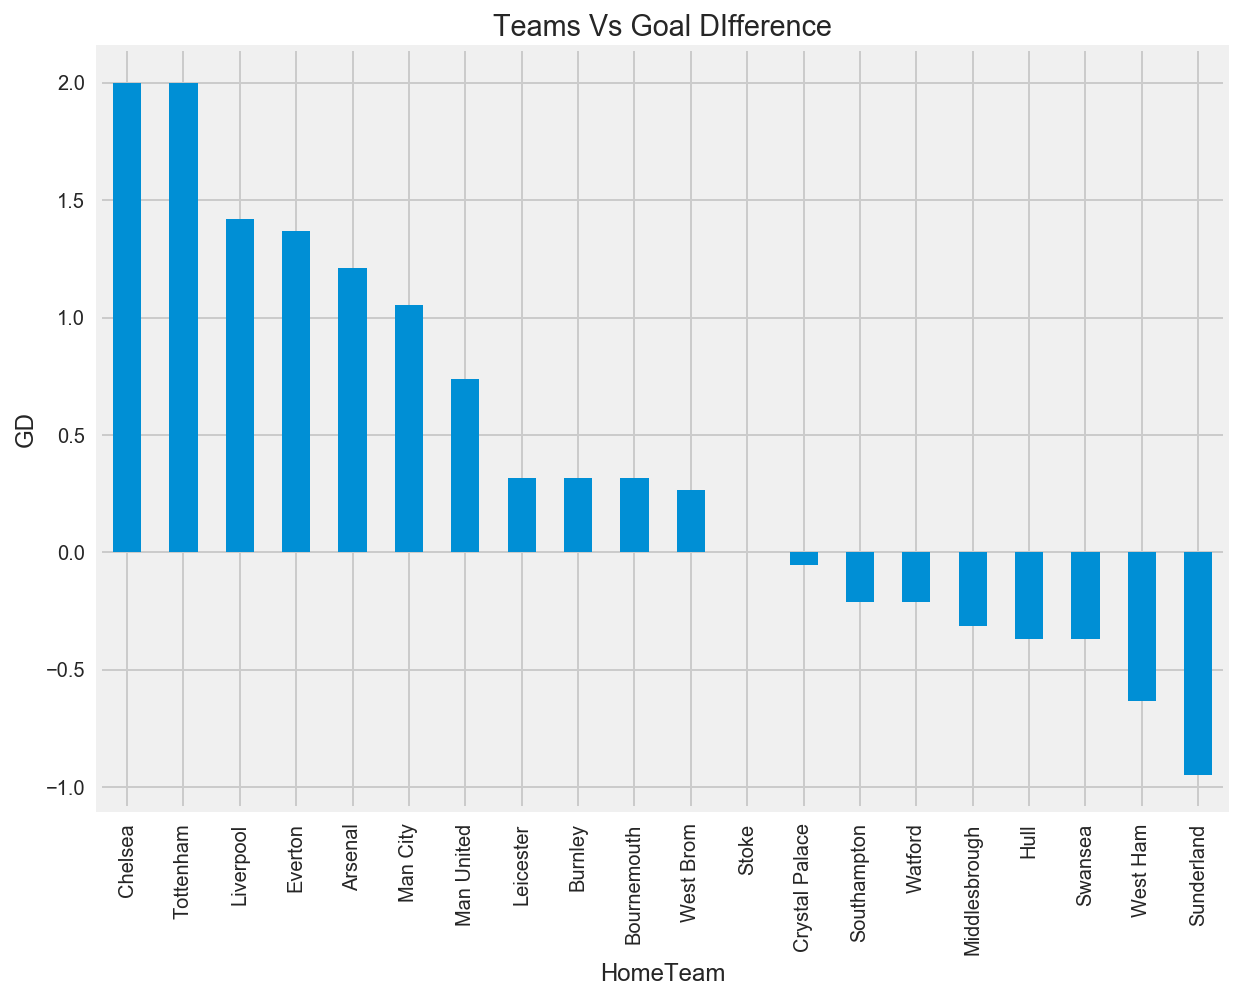

In [117]:
soccer.groupby('HomeTeam')['GD'].mean().sort_values(ascending=False).plot(kind='bar',title='Teams Vs Goal DIfference', figsize = (9, 7))
plt.xlabel('HomeTeam')
plt.ylabel('GD');

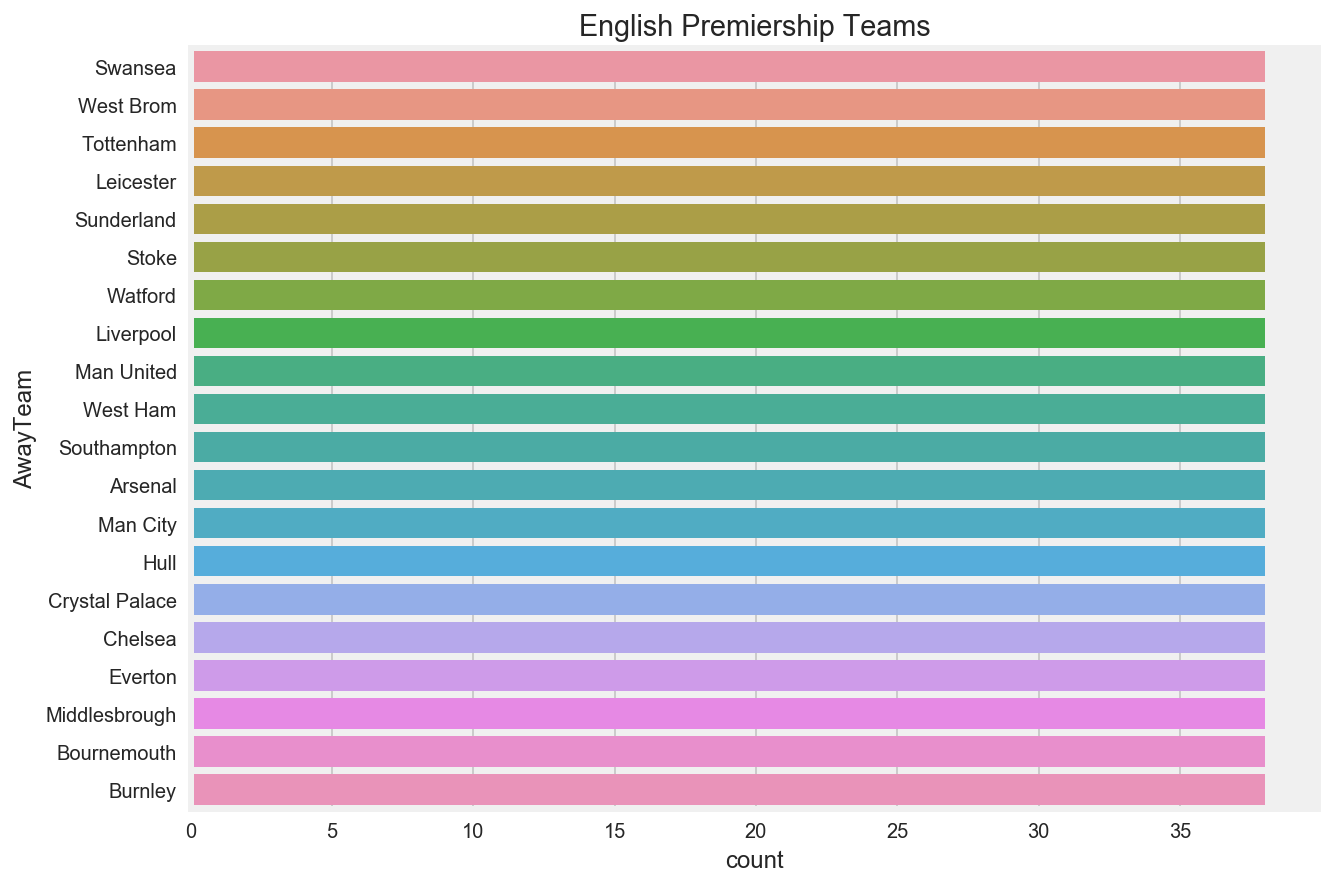

In [122]:
fig, ax = plt.subplots(figsize = (9, 7))
sns.countplot(data=soccer, y = 'AwayTeam', ax =ax)
ax.set_title('English Premiership Teams')